### Retail Strategy , Visualization, DATA Wrangling  & Analysis

In [1]:
# Library Import
import numpy as np
import pandas as pd

#Visualization
import seaborn as sns
from matplotlib import pyplot as plt

#Statistics
from scipy import stats
import statistics

#Dates
import matplotlib.dates as mdates
import missingno as msno


#Remove warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Read QVI_data.csv file
qdf=pd.read_csv("QVI_data.csv")
qdf.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,17-10-2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,16-09-2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,07-03-2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,08-03-2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,02-11-2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
qdf.shape

(264834, 12)

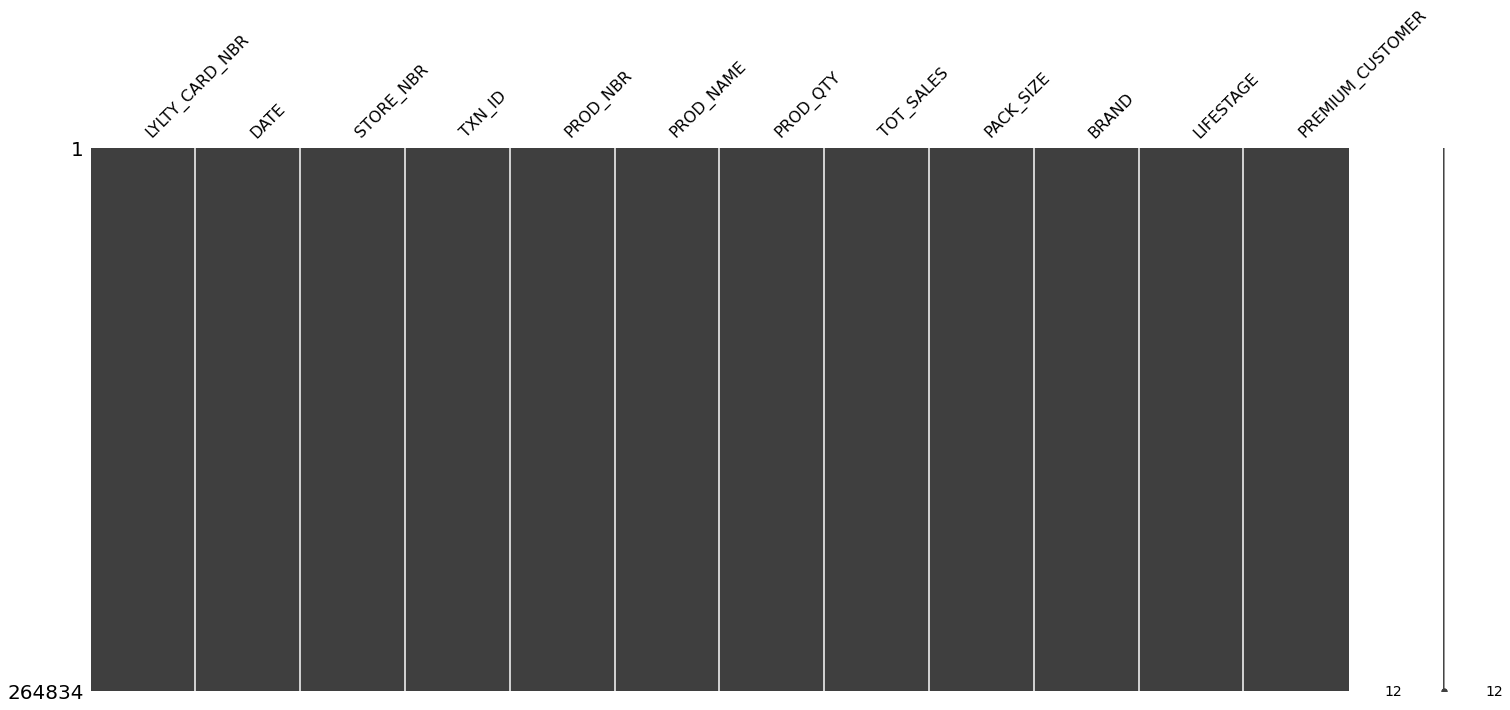

In [4]:
msno.matrix(qdf)

In [5]:
### Create Feature MONTHYEAR
qdf['MONTHYEAR'] = pd.DataFrame({'DATE': pd.date_range('2018-07-01','2019-06-01')})
qdf['MONTHYEAR']=pd.to_datetime(qdf['DATE']).dt.strftime('%Y%m') 

qdf["MONTHYEAR"].head()

0    201810
1    201809
2    201907
3    201908
4    201802
Name: MONTHYEAR, dtype: object

In [6]:
#qdf["MONTHYEAR"]=[''.join(x.split("-")[0:2]) for x in qdf.DATE]
qdf["MONTHYEAR"]=pd.to_numeric(qdf["MONTHYEAR"])  
qdf["MONTHYEAR"].head()

0    201810
1    201809
2    201907
3    201908
4    201802
Name: MONTHYEAR, dtype: int64

### Selecting the Control Store
### According to the Client's slection stores , Number 77, 86 and 88 are upon control
### We will match the control stores that are similar to the trial stores prior to the trial period 2019- Feb in trms of the Following:
### . Monthly Sales Revenue 
### . No. of Transactions per Customer
### . Monthly No of Customer


In [7]:
totalSales=qdf.groupby(["STORE_NBR", "MONTHYEAR"]).TOT_SALES.sum()
totalSales

STORE_NBR  MONTHYEAR
1          201801        76.0
           201802        42.6
           201803        45.5
           201804        47.9
           201805        47.6
                        ...  
272        201908        99.3
           201909        99.0
           201910        98.8
           201911       116.9
           201912        64.6
Name: TOT_SALES, Length: 6220, dtype: float64

In [8]:
nCustomers=qdf.groupby(["STORE_NBR", "MONTHYEAR"]).LYLTY_CARD_NBR.nunique()
nCustomers

STORE_NBR  MONTHYEAR
1          201801       19
           201802       12
           201803       11
           201804       10
           201805       10
                        ..
272        201908       12
           201909       11
           201910       11
           201911       14
           201912        8
Name: LYLTY_CARD_NBR, Length: 6220, dtype: int64

In [9]:
nTxnPerCust=qdf.groupby(["STORE_NBR","MONTHYEAR"]).TXN_ID.nunique()/qdf.groupby(["STORE_NBR","MONTHYEAR"]).LYLTY_CARD_NBR.nunique()
nTxnPerCust

STORE_NBR  MONTHYEAR
1          201801       1.0
           201802       1.0
           201803       1.0
           201804       1.0
           201805       1.0
                       ... 
272        201908       1.0
           201909       1.0
           201910       1.0
           201911       1.0
           201912       1.0
Length: 6220, dtype: float64

In [10]:
nChipsPerTxn=qdf.groupby(["STORE_NBR","MONTHYEAR"]).PROD_QTY.sum()/qdf.groupby(["STORE_NBR","MONTHYEAR"]).TXN_ID.nunique()
nChipsPerTxn

STORE_NBR  MONTHYEAR
1          201801       1.105263
           201802       1.000000
           201803       1.090909
           201804       1.400000
           201805       1.300000
                          ...   
272        201908       1.916667
           201909       2.000000
           201910       2.000000
           201911       1.857143
           201912       2.000000
Length: 6220, dtype: float64

In [11]:
avgPricePerUnit=qdf.groupby(["STORE_NBR","MONTHYEAR"]).TOT_SALES.sum()/qdf.groupby(["STORE_NBR","MONTHYEAR"]).PROD_QTY.sum()
avgPricePerUnit

STORE_NBR  MONTHYEAR
1          201801       3.619048
           201802       3.550000
           201803       3.791667
           201804       3.421429
           201805       3.661538
                          ...   
272        201908       4.317391
           201909       4.500000
           201910       4.490909
           201911       4.496154
           201912       4.037500
Length: 6220, dtype: float64

### Now, Concatenate and creating new DataFrame "MeasureOverTime"

In [12]:
df=[totalSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit]

MeasureOverTime=pd.concat(df, join="outer", axis=1)

MeasureOverTime

TOT_SALES  LYLTY_CARD_NBR    0         1         2
STORE_NBR MONTHYEAR                                                    
1         201801          76.0              19  1.0  1.105263  3.619048
          201802          42.6              12  1.0  1.000000  3.550000
          201803          45.5              11  1.0  1.090909  3.791667
          201804          47.9              10  1.0  1.400000  3.421429
          201805          47.6              10  1.0  1.300000  3.661538
...                        ...             ...  ...       ...       ...
272       201908          99.3              12  1.0  1.916667  4.317391
          201909          99.0              11  1.0  2.000000  4.500000
          201910          98.8              11  1.0  2.000000  4.490909
          201911         116.9              14  1.0  1.857143  4.496154
          201912          64.6               8  1.0  2.000000  4.037500

[6220 rows x 5 columns]

In [13]:
### Renaming TheColumns

MeasureOverTime.rename(columns={"TOT_SALES":"totSales","LYLTY_CARD_NBR":"nCustomers",0:"nChipsPerCust",1:"nChipsPerTxn",2:"avgPricePerUnit"}, inplace=True)

MeasureOverTime

totSales  nCustomers  nChipsPerCust  nChipsPerTxn  \
STORE_NBR MONTHYEAR                                                      
1         201801         76.0          19            1.0      1.105263   
          201802         42.6          12            1.0      1.000000   
          201803         45.5          11            1.0      1.090909   
          201804         47.9          10            1.0      1.400000   
          201805         47.6          10            1.0      1.300000   
...                       ...         ...            ...           ...   
272       201908         99.3          12            1.0      1.916667   
          201909         99.0          11            1.0      2.000000   
          201910         98.8          11            1.0      2.000000   
          201911        116.9          14            1.0      1.857143   
          201912         64.6           8            1.0      2.000000   

                     avgPricePerUnit  
STORE_NBR MONTHYEAR                   
1         201801            3.619048  
          201802            3.550000  
          201803            3.791667  
          201804            3.421429  
          201805            3.661538  
...                              ...  
272       201908            4.317391  
          201909            4.500000  
          201910            4.490909  
          201911            4.496154  
          201912            4.037500  

[6220 rows x 5 columns]

In [16]:
table = pd.pivot_table(qdf, index='STORE_NBR',columns="MONTHYEAR",values="TXN_ID",aggfunc='count') 
table

MONTHYEAR,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
1,19.0,12.0,11.0,10.0,10.0,12.0,40.0,38.0,42.0,36.0,...,26.0,40.0,43.0,41.0,13.0,7.0,9.0,16.0,9.0,7.0
2,10.0,8.0,8.0,15.0,13.0,7.0,29.0,31.0,29.0,30.0,...,36.0,37.0,43.0,38.0,9.0,9.0,9.0,8.0,8.0,8.0
3,20.0,22.0,27.0,32.0,24.0,27.0,110.0,115.0,90.0,91.0,...,90.0,89.0,94.0,109.0,23.0,24.0,33.0,36.0,29.0,24.0
4,28.0,34.0,40.0,30.0,36.0,31.0,130.0,112.0,105.0,117.0,...,109.0,123.0,106.0,110.0,30.0,24.0,21.0,23.0,23.0,29.0
5,27.0,27.0,20.0,22.0,23.0,19.0,92.0,90.0,92.0,89.0,...,79.0,94.0,73.0,102.0,23.0,26.0,24.0,23.0,19.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,9.0,4.0,8.0,15.0,6.0,9.0,42.0,42.0,27.0,46.0,...,45.0,38.0,43.0,29.0,6.0,7.0,8.0,6.0,9.0,9.0
269,31.0,32.0,23.0,30.0,32.0,28.0,111.0,111.0,94.0,108.0,...,99.0,114.0,104.0,92.0,26.0,26.0,25.0,27.0,26.0,33.0
270,41.0,23.0,25.0,28.0,20.0,31.0,106.0,111.0,103.0,98.0,...,113.0,105.0,111.0,109.0,29.0,25.0,27.0,21.0,27.0,27.0


### Checking of Null Values if any...

In [17]:
MeasureOverTime.reset_index()

,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201801,76.0,19,1.0,1.105263,3.619048
1,1,201802,42.6,12,1.0,1.000000,3.550000
2,1,201803,45.5,11,1.0,1.090909,3.791667
3,1,201804,47.9,10,1.0,1.400000,3.421429
4,1,201805,47.6,10,1.0,1.300000,3.661538
...,...,...,...,...,...,...,...
6215,272,201908,99.3,12,1.0,1.916667,4.317391
6216,272,201909,99.0,11,1.0,2.000000,4.500000
6217,272,201910,98.8,11,1.0,2.000000,4.490909
6218,272,201911,116.9,14,1.0,1.857143,4.496154


### Ovservation and filtering Stores throughout the Year(12 Months)

In [18]:
table.isnull().sum()

MONTHYEAR
201801    18
201802    15
201803    19
201804    14
201805    19
201806    19
201807     6
201808     8
201809     9
201810     8
201811     8
201812     9
201901    10
201902     9
201903     8
201904    11
201905     9
201906     9
201907    18
201908    15
201909    16
201910    16
201911    17
201912    18
dtype: int64

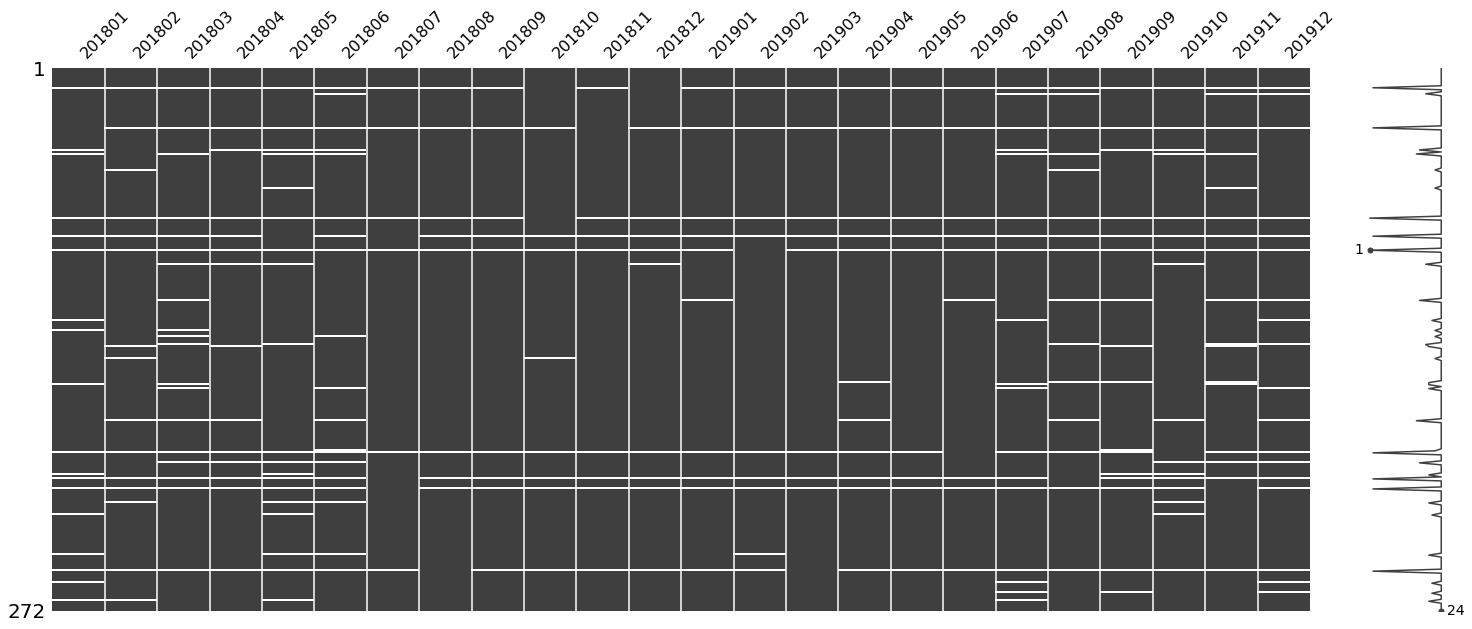

In [19]:
msno.matrix(table)

In [109]:
n_Store=table[table.isnull().any(axis=1)].index
n_Store

Int64Index([ 11,  14,  31,  42,  44,  52,  61,  76,  85,  92,  99, 117, 127,
            132, 135, 139, 140, 146, 158, 159, 161, 177, 192, 193, 198, 204,
            206, 211, 218, 224, 244, 252, 258, 263, 267],
           dtype='int64', name='STORE_NBR')

In [110]:
len(n_Store)

35

In [111]:
MeasureOverTime.head()

,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201801,76.0,19,1.0,1.105263,3.619048
1,1,201802,42.6,12,1.0,1.000000,3.550000
2,1,201803,45.5,11,1.0,1.090909,3.791667
3,1,201804,47.9,10,1.0,1.400000,3.421429
4,1,201805,47.6,10,1.0,1.300000,3.661538


In [112]:
len(MeasureOverTime)

5688

In [113]:
MeasureOverTime.reset_index(inplace=True)
MeasureOverTime.head()

,index,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
0,0,1,201801,76.0,19,1.0,1.105263,3.619048
1,1,1,201802,42.6,12,1.0,1.000000,3.550000
2,2,1,201803,45.5,11,1.0,1.090909,3.791667
3,3,1,201804,47.9,10,1.0,1.400000,3.421429
4,4,1,201805,47.6,10,1.0,1.300000,3.661538


In [114]:
MeasureOverTime=MeasureOverTime[~MeasureOverTime['STORE_NBR'].isin(n_Store)]
len(MeasureOverTime)

5688

In [115]:
Pre_Measure = MeasureOverTime.loc[MeasureOverTime['MONTHYEAR'] < 201902, :] 
len(Pre_Measure)

3081

In [116]:
Pre_Measure.head()

,index,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
0,0,1,201801,76.0,19,1.0,1.105263,3.619048
1,1,1,201802,42.6,12,1.0,1.000000,3.550000
2,2,1,201803,45.5,11,1.0,1.090909,3.791667
3,3,1,201804,47.9,10,1.0,1.400000,3.421429
4,4,1,201805,47.6,10,1.0,1.300000,3.661538


In [117]:
# Creating a Function to calculate Correlation between the trial and other stores

def CalCorr(inputT, metrics, trialStore):
    outP=pd.DataFrame({'Store1':[], 'Store2':[], 'Correlation':[]})
    a=inputT.loc[inputT['STORE_NBR']==trialStore,metrics]
    a.reset_index(drop=True, inplace=True)
    storeN=inputT['STORE_NBR'].unique()
    
    for i in storeN:
        b=inputT.loc[inputT['STORE_NBR']==i,metrics] 
        b.reset_index(drop=True, inplace=True)
        outP=outP.append({"Store1":trialStore,"Store2":i,"Correlation":b.corr(a)},ignore_index=True)
    
    return outP 

In [118]:
#A Function to calculate a Standardisation of difference

def CalMagDiff(inputT, metrics, trialStore):
    outP=pd.DataFrame({'Store1':[], 'Store2':[], 'Magnitude':[]})
    a=inputT.loc[inputT['STORE_NBR']==trialStore, metrics]
    a.reset_index(drop=True, inplace=True)
    storeN=inputT['STORE_NBR'].unique()    
    for i in storeN:
        b=inputT.loc[inputT['STORE_NBR']==i,metrics]
        b.reset_index(drop=True, inplace=True)
        c=abs(a-b)
        d=np.mean(1-(c-min(c))/(max(c)-min(c)))                  
        outP=outP.append({"Store1":trialStore,"Store2":i,"Magnitude":d},ignore_index=True)
    return outP 
    

### Selecting Control Store for Trial Store 77

In [119]:
trialStore=77
nSalesCorr=CalCorr(Pre_Measure,'totSales',trialStore)
nCustCorr=CalCorr(Pre_Measure,'nCustomers',trialStore)
# Calculate the value with Trial Store 77
nSalesMag= CalMagDiff(Pre_Measure,'totSales',trialStore)
nCustMag=CalMagDiff(Pre_Measure,'nCustomers',trialStore)


In [120]:
nSalesCorr.head()

,Store1,Store2,Correlation
0,77.0,1.0,0.873518
1,77.0,2.0,0.864093
2,77.0,3.0,0.956196
3,77.0,4.0,0.948598
4,77.0,5.0,0.923832


In [121]:
nSalesMag.head()

,Store1,Store2,Magnitude
0,77.0,1.0,0.649408
1,77.0,2.0,0.714165
2,77.0,3.0,0.495057
3,77.0,4.0,0.520120
4,77.0,5.0,0.475269


In [122]:
#Joining two Stores for Number of Sales
nSalesScore=pd.concat([nSalesCorr, nSalesMag["Magnitude"]], axis=1)

In [123]:
#Adding a new Column to calculate the weighted avg - nSalesScore
corrW=0.5
nSalesScore["scoreNSales"]=corrW*nSalesScore["Correlation"]+(1-corrW)*nSalesScore["Magnitude"]

nSalesScore.head()

,Store1,Store2,Correlation,Magnitude,scoreNSales
0,77.0,1.0,0.873518,0.649408,0.761463
1,77.0,2.0,0.864093,0.714165,0.789129
2,77.0,3.0,0.956196,0.495057,0.725627
3,77.0,4.0,0.948598,0.520120,0.734359
4,77.0,5.0,0.923832,0.475269,0.699550


In [124]:
#Now for number of Customers- nCustScore
nCustScore=pd.concat([nCustCorr, nCustMag["Magnitude"]], axis=1)
nCustScore.head()


,Store1,Store2,Correlation,Magnitude
0,77.0,1.0,0.896881,0.743590
1,77.0,2.0,0.935403,0.666667
2,77.0,3.0,0.967045,0.511218
3,77.0,4.0,0.958868,0.552036
4,77.0,5.0,0.952382,0.468694


In [125]:
#New column for weighted avg
nCustScore['scoreNCust']=corrW*nCustScore["Correlation"]+(1-corrW)*nCustScore["Magnitude"]
           

In [126]:
#Indexing for SalesNScore & CustNScore DataFrame
nSalesScore.set_index(["Store1","Store2"], inplace=True)
nCustScore.set_index(["Store1","Store2"], inplace=True)

In [127]:
#Creating a new DF as a container of avg sales and customers
scoreNCust=pd.concat([nSalesScore["scoreNSales"],nCustScore["scoreNCust"]], axis=1)
scoreNCust

scoreNSales  scoreNCust
Store1 Store2                         
77.0   1.0        0.761463    0.820235
       2.0        0.789129    0.801035
       3.0        0.725627    0.739132
       4.0        0.734359    0.755452
       5.0        0.699550    0.710538
...                    ...         ...
       268.0      0.673888    0.699654
       269.0      0.713037    0.715691
       270.0      0.723091    0.702696
       271.0      0.741585    0.725377
       272.0      0.782966    0.781031

[237 rows x 2 columns]

In [130]:
#New col addition for the avg of SalesNScore nd CustNScore
scoreNCust["FinalcontrolScore"]=0.5*(scoreNCust["scoreNSales"]+scoreNCust["scoreNCust"])
scoreNCust.head()

scoreNSales  scoreNCust  FinalcontrolScore
Store1 Store2                                            
77.0   1.0        0.761463    0.820235           0.790849
       2.0        0.789129    0.801035           0.795082
       3.0        0.725627    0.739132           0.732379
       4.0        0.734359    0.755452           0.744905
       5.0        0.699550    0.710538           0.705044

In [131]:
#To Find the Major Stores
scoreNCust.sort_values(by=["FinalcontrolScore"], ascending=False).head()

scoreNSales  scoreNCust  FinalcontrolScore
Store1 Store2                                            
77.0   121.0      0.870404    0.844291           0.857348
       50.0       0.841236    0.847757           0.844497
       188.0      0.839981    0.843768           0.841875
       17.0       0.806788    0.875400           0.841094
       205.0      0.853149    0.815604           0.834377

In [132]:
#Now we can see that store no. 121 is in control stores
controlStore=121


In [133]:
#Creating and assigning to a new DF PastSales assigning from Pre_Measure

controlStore=121

PastSales=Pre_Measure

store_type=[]
for i in PastSales["STORE_NBR"]:
    if i==trialStore:
        store_type.append("Trial Store")
    elif i==controlStore:
        store_type.append("Control Store")
    else:
        store_type.append("Other Store")
        
PastSales["store_type"]=store_type
PastSales.head()

,index,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,store_type
0,0,1,201801,76.0,19,1.0,1.105263,3.619048,Other Store
1,1,1,201802,42.6,12,1.0,1.000000,3.550000,Other Store
2,2,1,201803,45.5,11,1.0,1.090909,3.791667,Other Store
3,3,1,201804,47.9,10,1.0,1.400000,3.421429,Other Store
4,4,1,201805,47.6,10,1.0,1.300000,3.661538,Other Store


In [134]:
PastSales["store_type"].unique()

array(['Other Store', 'Trial Store', 'Control Store'], dtype=object)

### RE-Arranging the DATE column

In [135]:
PastSales["MonthOfTran"]=pd.to_datetime(PastSales["MONTHYEAR"].astype(str), format="%Y%m")
PastSales.head()

,index,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,store_type,MonthOfTran
0,0,1,201801,76.0,19,1.0,1.105263,3.619048,Other Store,2018-01-01
1,1,1,201802,42.6,12,1.0,1.000000,3.550000,Other Store,2018-02-01
2,2,1,201803,45.5,11,1.0,1.090909,3.791667,Other Store,2018-03-01
3,3,1,201804,47.9,10,1.0,1.400000,3.421429,Other Store,2018-04-01
4,4,1,201805,47.6,10,1.0,1.300000,3.661538,Other Store,2018-05-01


In [136]:
#Visualization for Control & Trial Store creating a DF
controlSplot=PastSales.loc[PastSales["store_type"]=="Control Store",["MonthOfTran","totSales"]]
controlSplot.set_index("MonthOfTran", inplace=True)
controlSplot.rename(columns={"totSales":"controlStore"},inplace=True)

trialSplot=PastSales.loc[PastSales["store_type"]=="Trial Store",["MonthOfTran","totSales"]]
trialSplot.set_index("MonthOfTran", inplace=True)
trialSplot.rename(columns={"totSales":"trialStore"},inplace=True)

otherSplot=PastSales.loc[PastSales["store_type"]=="Other Store",["MonthOfTran","totSales"]]
otherSplot=pd.DataFrame(otherSplot.groupby("MonthOfTran").totSales.mean())
otherSplot.rename(columns={"totSales":"otherStore"},inplace=True)

#Now Joining
salesJplot=pd.concat([controlSplot,trialSplot,otherSplot], axis=1)
salesJplot

,controlStore,trialStore,otherStore
MonthOfTran,,,
2018-01-01,42.3,25.9,136.050213
2018-02-01,61.0,35.4,132.021277
2018-03-01,57.9,73.8,134.709362
2018-04-01,49.8,31.6,135.828936
2018-05-01,54.8,75.1,133.259149
2018-06-01,75.6,49.0,140.129362
2018-07-01,331.5,269.2,559.858298
2018-08-01,244.1,190.4,528.917234
2018-09-01,248.9,207.2,541.902979


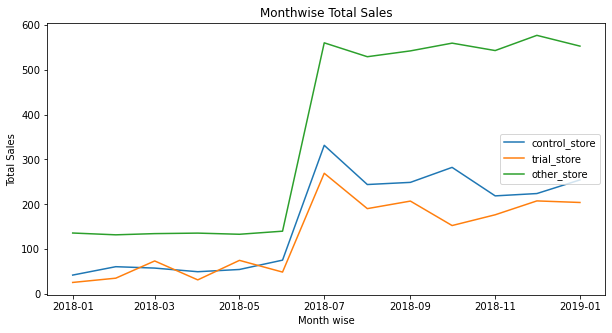

In [137]:
plt.figure(figsize=(10,5))
plt.plot(salesJplot)
plt.title("Monthwise Total Sales")
plt.xlabel("Month wise")
plt.ylabel("Total Sales")
plt.legend(["control_store","trial_store","other_store"], loc=5)
plt.show()

### Total sales Ploting for all

In [138]:
#Visualization for Control & Trial Store creating a DF
controlCustplot=PastSales.loc[PastSales["store_type"]=="Control Store",["MonthOfTran","nCustomers"]]
controlCustplot.set_index("MonthOfTran", inplace=True)
controlCustplot.rename(columns={"nCust":"controlStore"},inplace=True)

trialCustplot=PastSales.loc[PastSales["store_type"]=="Trial Store",["MonthOfTran","nCustomers"]]
trialCustplot.set_index("MonthOfTran", inplace=True)

trialCustplot.rename(columns={"nCust":"trialStore"},inplace=True)

otherCustplot=PastSales.loc[PastSales["store_type"]=="Other Store",["MonthOfTran","nCustomers"]]
otherCustplot=pd.DataFrame(otherCustplot.groupby("MonthOfTran").nCustomers.mean())


otherCustplot.rename(columns={"nCustomers":"Other Store"},inplace=True)

In [139]:
#Assesment of trial
Pre_Measure.head()
    
    

,index,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,store_type,MonthOfTran
0,0,1,201801,76.0,19,1.0,1.105263,3.619048,Other Store,2018-01-01
1,1,1,201802,42.6,12,1.0,1.000000,3.550000,Other Store,2018-02-01
2,2,1,201803,45.5,11,1.0,1.090909,3.791667,Other Store,2018-03-01
3,3,1,201804,47.9,10,1.0,1.400000,3.421429,Other Store,2018-04-01
4,4,1,201805,47.6,10,1.0,1.300000,3.661538,Other Store,2018-05-01


### Introducing Scaling factor to apply on control_store

In [140]:

#Dividing the sum of trial_store for trial_store by sum of totSales for control_store say, "SalesScalingFactor" 
trialSum=Pre_Measure.loc[Pre_Measure["store_type"]=="Trial Store","totSales"].sum()
controlSum=Pre_Measure.loc[Pre_Measure["store_type"]=="Control Store","totSales"].sum()
SalesScalingFactor = trialSum / controlSum
SalesScalingFactor

0.7917870793325253

In [141]:
#Creating a DF , resetting the index
ScaledControlSales=MeasureOverTime
ScaledControlSales.head()

,index,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
0,0,1,201801,76.0,19,1.0,1.105263,3.619048
1,1,1,201802,42.6,12,1.0,1.000000,3.550000
2,2,1,201803,45.5,11,1.0,1.090909,3.791667
3,3,1,201804,47.9,10,1.0,1.400000,3.421429
4,4,1,201805,47.6,10,1.0,1.300000,3.661538


In [142]:
ScaledControlSales=ScaledControlSales.loc[ScaledControlSales["STORE_NBR"]==controlStore]
ScaledControlSales

,index,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
2592,2732,121,201801,42.3,8,1.000000,1.500000,3.525000
2593,2733,121,201802,61.0,11,1.000000,1.545455,3.588235
2594,2734,121,201803,57.9,9,1.000000,1.888889,3.405882
2595,2735,121,201804,49.8,9,1.000000,1.666667,3.320000
2596,2736,121,201805,54.8,7,1.142857,1.875000,3.653333
2597,2737,121,201806,75.6,12,1.000000,1.833333,3.436364
2598,2738,121,201807,331.5,46,1.195652,1.745455,3.453125
2599,2739,121,201808,244.1,46,1.043478,1.583333,3.211842
2600,2740,121,201809,248.9,41,1.024390,1.642857,3.607246
2601,2741,121,201810,282.3,46,1.021739,1.765957,3.401205


In [143]:
ScaledControlSales["ControlSales"]=ScaledControlSales["totSales"]*SalesScalingFactor

ScaledControlSales.head()


,index,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,ControlSales
2592,2732,121,201801,42.3,8,1.000000,1.500000,3.525000,33.492593
2593,2733,121,201802,61.0,11,1.000000,1.545455,3.588235,48.299012
2594,2734,121,201803,57.9,9,1.000000,1.888889,3.405882,45.844472
2595,2735,121,201804,49.8,9,1.000000,1.666667,3.320000,39.430997
2596,2736,121,201805,54.8,7,1.142857,1.875000,3.653333,43.389932


In [144]:
#DF for % diffeence
PerDiff=ScaledControlSales[["MONTHYEAR","ControlSales"]]
PerDiff.reset_index(drop=True, inplace=True)

#Concatenate with trial_store
trialSales=MeasureOverTime.loc[MeasureOverTime["STORE_NBR"]==trialStore,"totSales"]
trialSales.reset_index(drop=True, inplace=True)
PerDiff=pd.concat([PerDiff, trialSales], axis=1)
PerDiff.rename(columns={"totSales":"trialSales"},inplace=True)
PerDiff 


,MONTHYEAR,ControlSales,trialSales
0,201801,33.492593,25.9
1,201802,48.299012,35.4
2,201803,45.844472,73.8
3,201804,39.430997,31.6
4,201805,43.389932,75.1
5,201806,59.859103,49.0
6,201807,262.477417,269.2
7,201808,193.275226,190.4
8,201809,197.075804,207.2
9,201810,223.521492,152.7


In [145]:
PerDiff['PerDiff']=abs(PerDiff.ControlSales - PerDiff.trialSales)/ PerDiff.ControlSales
PerDiff

,MONTHYEAR,ControlSales,trialSales,PerDiff
0,201801,33.492593,25.9,0.226695
1,201802,48.299012,35.4,0.267066
2,201803,45.844472,73.8,0.609791
3,201804,39.430997,31.6,0.198600
4,201805,43.389932,75.1,0.730816
5,201806,59.859103,49.0,0.181411
6,201807,262.477417,269.2,0.025612
7,201808,193.275226,190.4,0.014876
8,201809,197.075804,207.2,0.051372
9,201810,223.521492,152.7,0.316844


In [146]:
# Now based on scaled % difference in pre trial period we shall use a standard deviation
stdDev=statistics.stdev(PerDiff.loc[PerDiff["MONTHYEAR"] < 201902, "PerDiff"])
stdDev
                                  

0.22728140543509312

In [147]:
#Degrees of Freedom dof =8-1 =7 (months) # we shall test for the hypothesys for trial and control stores
# Creating a new column
dof=7
PerDiff["tValue"]=(PerDiff["PerDiff"]-0)/stdDev
PerDiff.loc[(PerDiff["MONTHYEAR"] > 201901) & (PerDiff["MONTHYEAR"] < 201905),'tValue']

13    2.398193
14    0.287415
15    0.909458
Name: tValue, dtype: float64

In [148]:
#To find 95th %tile of the t Distribution for Mar-Apr with dof=7
dof=7
#t.isf(0.05, dof)

In [149]:
#Adding new column "TranMonth" to ScaledControlSales
ScaledControlSales["TranMonth"]=pd.to_datetime(ScaledControlSales["MONTHYEAR"].astype(str), format="%Y%m")
ScaledControlSales

,index,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,ControlSales,TranMonth
2592,2732,121,201801,42.3,8,1.000000,1.500000,3.525000,33.492593,2018-01-01
2593,2733,121,201802,61.0,11,1.000000,1.545455,3.588235,48.299012,2018-02-01
2594,2734,121,201803,57.9,9,1.000000,1.888889,3.405882,45.844472,2018-03-01
2595,2735,121,201804,49.8,9,1.000000,1.666667,3.320000,39.430997,2018-04-01
2596,2736,121,201805,54.8,7,1.142857,1.875000,3.653333,43.389932,2018-05-01
2597,2737,121,201806,75.6,12,1.000000,1.833333,3.436364,59.859103,2018-06-01
2598,2738,121,201807,331.5,46,1.195652,1.745455,3.453125,262.477417,2018-07-01
2599,2739,121,201808,244.1,46,1.043478,1.583333,3.211842,193.275226,2018-08-01
2600,2740,121,201809,248.9,41,1.024390,1.642857,3.607246,197.075804,2018-09-01
2601,2741,121,201810,282.3,46,1.021739,1.765957,3.401205,223.521492,2018-10-01


### Visualization

In [150]:
#Extracting controlSales from ScaledControlSales for control_store
controlSales=ScaledControlSales.loc[:, ["TranMonth", "ControlSales"]]
controlSales.set_index("TranMonth", inplace=True)
controlSales.rename(columns={"ControlSales":'Control Sales'},inplace=True)
controlSales

,Control Sales
TranMonth,
2018-01-01,33.492593
2018-02-01,48.299012
2018-03-01,45.844472
2018-04-01,39.430997
2018-05-01,43.389932
2018-06-01,59.859103
2018-07-01,262.477417
2018-08-01,193.275226
2018-09-01,197.075804


In [151]:
ScaledControlSales.head()

,index,STORE_NBR,MONTHYEAR,totSales,nCustomers,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,ControlSales,TranMonth
2592,2732,121,201801,42.3,8,1.000000,1.500000,3.525000,33.492593,2018-01-01
2593,2733,121,201802,61.0,11,1.000000,1.545455,3.588235,48.299012,2018-02-01
2594,2734,121,201803,57.9,9,1.000000,1.888889,3.405882,45.844472,2018-03-01
2595,2735,121,201804,49.8,9,1.000000,1.666667,3.320000,39.430997,2018-04-01
2596,2736,121,201805,54.8,7,1.142857,1.875000,3.653333,43.389932,2018-05-01


In [152]:
trialSales=ScaledControlSales.loc[ScaledControlSales["STORE_NBR"]==121,["TranMonth", "totSales"]]
trialSales.set_index("TranMonth", inplace=True)
trialSales.rename(columns={"totSales":"Trial Sales"}, inplace=True)
trialSales

,Trial Sales
TranMonth,
2018-01-01,42.3
2018-02-01,61.0
2018-03-01,57.9
2018-04-01,49.8
2018-05-01,54.8
2018-06-01,75.6
2018-07-01,331.5
2018-08-01,244.1
2018-09-01,248.9


In [153]:
controlSales["control of 5% confidence intrval"]=controlSales["Control Sales"]*(1-stdDev*2)
controlSales["control of 95% confidence intrval"]=controlSales["Control Sales"]*(1+stdDev*2)
controlSales

,Control Sales,control of 5% confidence intrval,control of 95% confidence intrval
TranMonth,,,
2018-01-01,33.492593,18.268106,48.717081
2018-02-01,48.299012,26.344077,70.253946
2018-03-01,45.844472,25.005280,66.683664
2018-04-01,39.430997,21.507132,57.354861
2018-05-01,43.389932,23.666483,63.113381
2018-06-01,59.859103,32.649381,87.068825
2018-07-01,262.477417,143.164944,381.789889
2018-08-01,193.275226,105.419496,281.130956
2018-09-01,197.075804,107.492473,286.659135


In [154]:
#Merging  two DF
MergeSales=pd.merge(controlSales, trialSales, left_index=True, right_index=True)
MergeSales

,Control Sales,control of 5% confidence intrval,control of 95% confidence intrval,Trial Sales
TranMonth,,,,
2018-01-01,33.492593,18.268106,48.717081,42.3
2018-02-01,48.299012,26.344077,70.253946,61.0
2018-03-01,45.844472,25.005280,66.683664,57.9
2018-04-01,39.430997,21.507132,57.354861,49.8
2018-05-01,43.389932,23.666483,63.113381,54.8
2018-06-01,59.859103,32.649381,87.068825,75.6
2018-07-01,262.477417,143.164944,381.789889,331.5
2018-08-01,193.275226,105.419496,281.130956,244.1
2018-09-01,197.075804,107.492473,286.659135,248.9


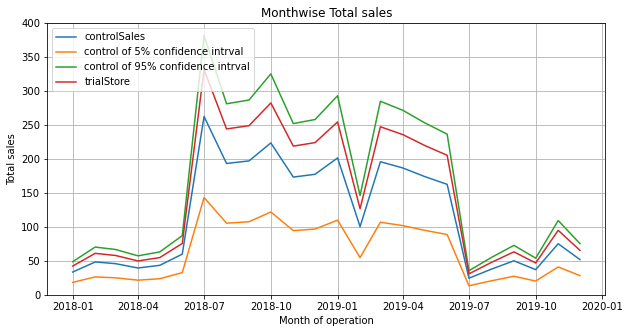

In [155]:
plt.figure(figsize=(10,5))
plt.plot(MergeSales)
plt.title("Monthwise Total sales")
plt.xlabel("Month of operation")
plt.ylabel("Total sales")

#Legend
plt.legend(["controlSales","control of 5% confidence intrval", "control of 95% confidence intrval", "trialStore"], loc=2)

#New y-axis limit
plt.ylim(0,400)

plt.grid()
plt.show()

In [157]:
#nCustomers
trialCust=PastSales.loc[PastSales["store_type"]=="trialStore","nCustomers"].sum()
SalesScalingFactor=trialCust/scoreNCust
SalesScalingFactor

scoreNSales  scoreNCust  FinalcontrolScore
Store1 Store2                                            
77.0   1.0             0.0         0.0                0.0
       2.0             0.0         0.0                0.0
       3.0             0.0         0.0                0.0
       4.0             0.0         0.0                0.0
       5.0             0.0         0.0                0.0
...                    ...         ...                ...
       268.0           0.0         0.0                0.0
       269.0           0.0         0.0                0.0
       270.0           0.0         0.0                0.0
       271.0           0.0         0.0                0.0
       272.0           0.0         0.0                0.0

[237 rows x 3 columns]

In [158]:
trialStore=86
nSalesCorr=CalCorr(Pre_Measure,'totSales',trialStore)
nCustCorr=CalCorr(Pre_Measure,'nCustomers',trialStore)
# Calculate the value with Trial Store 86
nSalesMag= CalMagDiff(Pre_Measure,'totSales',trialStore)
nCustMag=CalMagDiff(Pre_Measure,'nCustomers',trialStore)

In [159]:
nSalesCorr.head()

,Store1,Store2,Correlation
0,86.0,1.0,0.854858
1,86.0,2.0,0.904286
2,86.0,3.0,0.953843
3,86.0,4.0,0.971351
4,86.0,5.0,0.979290


In [160]:
nSalesMag.head()

,Store1,Store2,Magnitude
0,86.0,1.0,0.524287
1,86.0,2.0,0.476824
2,86.0,3.0,0.734268
3,86.0,4.0,0.579498
4,86.0,5.0,0.650246


In [161]:
#Joining two Stores for Number of Sales
nSalesScore=pd.concat([nSalesCorr, nSalesMag["Magnitude"]], axis=1)

In [162]:
#Adding a new Column to calculate the weighted avg - nSalesScore
corrW=0.5
nSalesScore["scoreNSales"]=corrW*nSalesScore["Correlation"]+(1-corrW)*nSalesScore["Magnitude"]

nSalesScore.head()

,Store1,Store2,Correlation,Magnitude,scoreNSales
0,86.0,1.0,0.854858,0.524287,0.689573
1,86.0,2.0,0.904286,0.476824,0.690555
2,86.0,3.0,0.953843,0.734268,0.844055
3,86.0,4.0,0.971351,0.579498,0.775425
4,86.0,5.0,0.979290,0.650246,0.814768


In [163]:
#Now for number of Customers- nCustScore
nCustScore=pd.concat([nCustCorr, nCustMag["Magnitude"]], axis=1)
nCustScore.head()

,Store1,Store2,Correlation,Magnitude
0,86.0,1.0,0.915198,0.551499
1,86.0,2.0,0.944600,0.452854
2,86.0,3.0,0.966301,0.615385
3,86.0,4.0,0.983177,0.511538
4,86.0,5.0,0.983573,0.706731


In [166]:
#Visualization for Control & Trial Store creating a DF
#Store=86

controlSplot=PastSales.loc[PastSales["store_type"]=="Control Store",["MonthOfTran","totSales"]]
controlSplot.set_index("MonthOfTran", inplace=True)
controlSplot.rename(columns={"totSales":"controlStore"},inplace=True)

trialSplot=PastSales.loc[PastSales["store_type"]=="Trial Store",["MonthOfTran","totSales"]]
trialSplot.set_index("MonthOfTran", inplace=True)
trialSplot.rename(columns={"totSales":"trialStore"},inplace=True)

otherSplot=PastSales.loc[PastSales["store_type"]=="Other Store",["MonthOfTran","totSales"]]
otherSplot=pd.DataFrame(otherSplot.groupby("MonthOfTran").totSales.mean())
otherSplot.rename(columns={"totSales":"otherStore"},inplace=True)

#Now Joining
salesCombplot=pd.concat([controlSplot,trialSplot,otherSplot], axis=1)
salesCombplot

,controlStore,trialStore,otherStore
MonthOfTran,,,
2018-01-01,42.3,25.9,136.050213
2018-02-01,61.0,35.4,132.021277
2018-03-01,57.9,73.8,134.709362
2018-04-01,49.8,31.6,135.828936
2018-05-01,54.8,75.1,133.259149
2018-06-01,75.6,49.0,140.129362
2018-07-01,331.5,269.2,559.858298
2018-08-01,244.1,190.4,528.917234
2018-09-01,248.9,207.2,541.902979


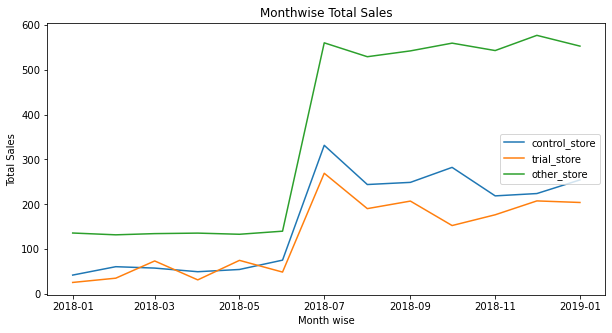

In [165]:
plt.figure(figsize=(10,5))
plt.plot(salesCombplot)
plt.title("Monthwise Total Sales")
plt.xlabel("Month wise")
plt.ylabel("Total Sales")
plt.legend(["control_store","trial_store","other_store"], loc=5)
plt.show()